In [4]:
%matplotlib inline
import pandas as pd

loansdata = pd.read_csv('/home/sravan/git/ML/modified_loans.csv')
loansdata['Interest.Rate'][0:4]

0     8.90%
1    12.12%
2    21.98%
3     9.99%
Name: Interest.Rate, dtype: object

In [5]:
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].str.replace('%','')
#print(loansdata['Interest.Rate'])
loansdata['Loan.Length'] = loansdata['Loan.Length'].str.replace('months','')
#print(loansdata['Loan.Length'])

In [6]:
loans_data = loansdata.dropna()
print(loans_data[90:93])
print(loansdata[90:93])

    Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
90             95096                        7925         16.29         36    
91             67629                       15925          7.62         36    
92             51929                        9500         15.81         36    

          Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
90  debt_consolidation               21.25%    GA           RENT   
91  debt_consolidation                6.48%    IL       MORTGAGE   
92      small_business               11.35%    CA           RENT   

    Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
90         2000.00    665-669                  6                      7840   
91         6000.00    765-769                  8                     19539   
92         2666.67    670-674                 15                      5610   

    Inquiries.in.the.Last.6.Months Employment.Length  
90                               0           6

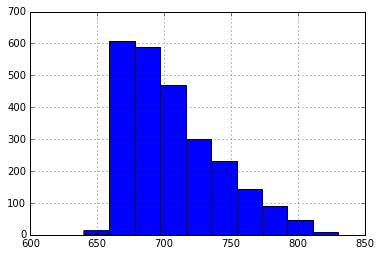

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('/home/sravan/git/ML/loanf.csv')
fico = loansmin['FICO.Score']
p = fico.hist()

AttributeError: 'AxesSubplot' object has no attribute 'set_Xticklabels'

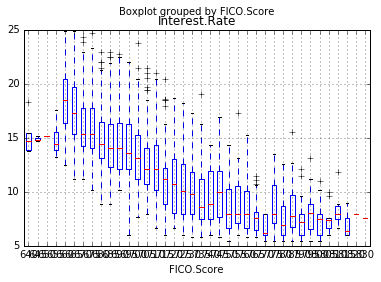

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
p = loansmin.boxplot('Interest.Rate','FICO.Score')
q = p.set_Xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])
q0 = p.set_xlabel('FICO.Score')
q1 = p.set_ylabel('Interest.Rate')
q2 = p.set_title('                                       ')

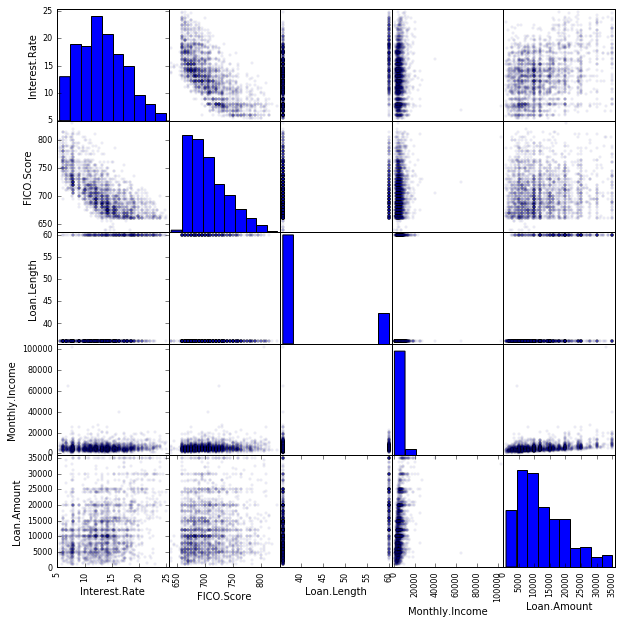

In [10]:
#import pandas as pd
#loansmin = pd.read_csv('../datasets/loanf.csv')
a = pd.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='hist')

In [13]:
%pylab inline
import pylab as pl
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('/home/sravan/git/ML/loanf.csv')

intrest_rate = df['Interest.Rate']
loan_amt = df['Loan.Amount']
fico = df['FICO.Score']

# reshape the data from a pandas Series to columns 
# the dependent variable
y = np.matrix(intrest_rate).transpose()

# the independent variables shaped as columns
x1 = np.matrix(loan_amt).transpose()
x2 = np.matrix(fico).transpose()

# put the two columns together to create an input matrix 
# if we had n independent variables we would have n columns here

x = np.column_stack([x1, x2])


# create a linear model and fit it to the data
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print ('Coefficients: ', f.params[0:2])
print ('Intercept: ', f.params[2])
print ('P-Values: ', f.pvalues)
print ('R-Squared: ', f.rsquared)


Populating the interactive namespace from numpy and matplotlib
Coefficients:  [  7.28827983e+01   2.10747769e-04]
Intercept:  -0.0884424221792
P-Values:  [  0.00000000e+000   5.96972978e-203   0.00000000e+000]
R-Squared:  0.656632624649
